In [ ]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
# Import train_test_split()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.model_selection import cross_val_score
import lightgbm as lgbm
from catboost import CatBoostRegressor
import  tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
#import smogn
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PolynomialFeatures
from itertools import combinations
#import smong 
from sklearn.linear_model import LinearRegression, RidgeCV
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')


## Step 2: Load the data

Next, we'll load the training and test data.

We set index_col=0 in the code cell below to use the id column to index the DataFrame. (If you're not sure how this works, try temporarily removing index_col=0 and see how it changes the result.)


In [ ]:
# import lux
# Load the training data
train = pd.read_csv("../input/30-days-of-ml/train.csv")
test = pd.read_csv("../input/30-days-of-ml/test.csv")
# Preview the data
train.head()

### Duplicates 

In [ ]:
train.duplicated(subset='id', keep='first').sum()

# Convert Dtypes : 

In [ ]:
train[train.select_dtypes(['float64']).columns] = train[train.select_dtypes(['float64']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object']).columns] = train.select_dtypes(['object']).apply(lambda x: x.astype('category'))

### Num/Cat Features 

In [ ]:
cat_columns = train.drop(['id','target'], axis=1).select_dtypes(exclude=['int64','float64']).columns
num_columns = train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64']).columns

##  Target 
###  exploring target data main statistics

In [ ]:
train['target'].describe()

In [ ]:
train['target'].describe().iloc[1:].plot.barh(color=v0,alpha=.5,figsize=(12,5))
plt.title('Target data statistics',fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0,10.8,.5));

### Distribution of Target

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
f, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

f.suptitle('Target', fontsize=16)
g = sns.kdeplot(train['target'], shade=True, label="%.2f"%(train['target'].skew()), ax=axes[0])
g = g.legend(loc="best")
stats.probplot(train['target'], plot=axes[1])
sns.boxplot(x='target', data=train, orient='h', ax=axes[2]);
plt.tight_layout()
plt.show()

In [ ]:
n, bins, patches = plt.hist(x=train['target'], bins='auto', color='blue',alpha=0.7, rwidth=0.5)
plt.xlabel("target")
plt.show()

### Box plot of target data with percentile of .1% and 99.9%

In [ ]:
y=train['target']
plt.figure(figsize=(12,6))
sns.boxplot(x=y, width=.4);
plt.axvline(np.percentile(y,.1), label='.1%', c='orange', linestyle=':', linewidth=3)
plt.axvline(np.percentile(y,.5), label='.5%', c='darkblue', linestyle=':', linewidth=3)
plt.axvline(np.percentile(y,1), label='1%', c='green', linestyle=':', linewidth=3)
plt.axvline(np.percentile(y,99.9), label='99.9%', c='blue', linestyle=':', linewidth=3)
plt.axvline(np.percentile(y,99), label='99%', c='gold', linestyle=':', linewidth=3)
plt.legend()
plt.title('Box plot of target data', fontsize=16)
plt.xticks(np.arange(0,10.8,.5));

In [ ]:
np.percentile(y,75)

In [ ]:
np.percentile(y,100)

In [ ]:
y= train['target']
factor = 1.2
qmin=y.quantile(0.2)
qmax=y.quantile(0.98)
q1 = y.quantile(0.25)
q3 = y.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (factor * iqr)
upper_bound = q3 + (factor * iqr)
print(lower_bound)
print(upper_bound)

### Bin target 

In [ ]:
bins = [0.1403287728456096,  6.558195657350646,9.912509990109717,10.411991752210524]
# Bin labels
labels1 = [ 'MinorityOne ', 'Majority', 'MinorityTwo']
trainessai=train.copy()
# Bin the continuous variable ConvertedSalary using these boundaries
trainessai['target_binned'] = pd.cut(trainessai['target'], 
                                bins=bins,labels=labels1 )

In [ ]:
labels = trainessai['target_binned'].astype('category').cat.categories.tolist()
counts = trainessai['target_binned'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

###  Conculsion : 
Several real world prediction problems involve forecasting rare values of a target variable. When this variable is nominal we have a problem of class imbalance that was already studied thoroughly within machine learning. For regression tasks, where the target variable is continuous, few works exist addressing this type of problem. Still, important application areas involve forecasting rare extreme values of a continuous target variable. Namely, we propose to address such tasks by sampling approaches. These approaches change the distribution of the given training data set to decrease the problem of imbalance between the rare target cases and the most frequent ones. We present a modification of the well-known Smote algorithm that allows its use on these regression tasks



####  Data Centric approch : 
A Python implementation of Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise (SMOGN). Conducts the Synthetic Minority Over-Sampling Technique for Regression (SMOTER) with traditional interpolation, as well as with the introduction of Gaussian Noise (SMOTER-GN). Selects between the two over-sampling techniques by the KNN distances underlying a given observation. If the distance is close enough, SMOTER is applied. If too far away, SMOTER-GN is applied. Useful for prediction problems where regression is applicable, but the values in the interest of predicting are rare or uncommon. This can also serve as a useful alternative to log transforming a skewed response variable, especially if generating synthetic data is also of interest. 
#### Add sample weight :
            fit(df["Var1"], df["Var2"], sample_weight=df["N"])
            
The weights enable training a model that is more accurate for certain values of the input (e.g., where the cost of error is higher). Internally, weights w are multiplied by the residuals in the loss function 
   
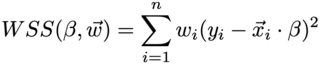!

         Create equal weights and then augment the last 2 ones
        sample_weight = np.ones(n_samples) * 20
        sample_weight[-2:] *= 30

        plt.scatter(X, y, s=sample_weight, c='grey', edgecolor='black')

        # The unweighted model
        regr = LinearRegression()
        regr.fit(X, y)
        plt.plot(X, regr.predict(X), color='blue', linewidth=3, label='Unweighted model')

         The weighted model
        regr = LinearRegression()
        regr.fit(X, y, sample_weight)
        plt.plot(X, regr.predict(X), color='red', linewidth=3, label='Weighted model')

         The weighted model - scaled weights
        regr = LinearRegression()
        sample_weight = sample_weight / sample_weight.max()
        regr.fit(X, y, sample_weight)
        plt.plot(X, regr.predict(X), color='yellow', linewidth=2, label='Weighted model - scaled', linestyle='dashed')
        plt.xticks(());plt.yticks(());plt.legend();
        
        model = XGBRegressor()
        model.fit(df[['A','B']],df['D'],sample_weight=df['C'])
        sudo apt-get install python3.6
        sudo apt-get install git
        git clone –recursive https://github.com/dmlc/xgboost
        cd xgboost; make -j4
        cd python-package; python3 setup.py install
        
More explanation : 

19

The sample_weight parameter allows you to specify a different weight for each training example. The scale_pos_weight parameter lets you provide a weight for an entire class of examples ("positive" class).

These correspond to two different approaches to cost-sensitive learning. If you believe that the cost of misclassifying positive examples (missing a cancer patient) is the same for all positive examples (but more than misclassifying negative ones, e.g. telling someone they have cancer when they actually don't) then you can specify one single weight for all positive examples via scale_pos_weight.

XGBoost treats labels = 1 as the "positive" class. This is evident from the following piece of code:

if (info.labels[i] == 1.0f) w *= param_.scale_pos_weight

See this question.

The other scenario is where you have example-dependent costs. One example is detecting fraudulent transactions. Not only a false negative (missing a fraudulent transaction) is more costly than a false positive (blocking a legal transaction), but the cost of missing a false negative is proportional to the amount of money being stolen. So you want to give larger weights to positive (fraudulent) examples with higher amounts. In this case, you can use the sample_weight parameter to specify example-specific weights.




All the documentation says that is should be:

    scale_pos_weight = count(negative examples)/count(Positive examples)

In practice, that works pretty well, but if your dataset is extremely unbalanced I'd recommend using something more conservative like:

    scale_pos_weight = sqrt(count(negative examples)/count(Positive examples)) 

This is useful to limit the effect of a multiplication of positive examples by a very high weight.


In [ ]:
from collections import counter 
scale_pos_weight1 = count(negative examples)/count(Positive examples)
scale_pos_weight2 = sqrt(count(negative examples)/count(Positive examples)) 

In [ ]:
ar = np.array([3,4,5,14,2,4,3,7])
np.where((ar>3) & (ar<6), 'yo', ar)
train['wieght']

## Define the model features and target
### Extract X and y 

In [ ]:
# Create arrays for the features and the response variable
y = train['target']
X = train.drop(['id','target'], axis=1)

In [ ]:
X.shape

## Create test and train groups

Now we’ve got our dataframe ready we can split it up into the train and test datasets for our model to use. We’ll use the Scikit-Learn train_test_split() function for this. By passing in the X dataframe of raw features, the y series containing the target, and the size of the test group (i.e. 0.1 for 10%), we get back the X_train, X_test, y_train and y_test data to use in the model.

In [ ]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

##  What should we do for each colmun
### Separate features by dtype

Next we’ll separate the features in the dataframe by their datatype. There are a few different ways to achieve this. I’ve used the select_dtypes() function to obtain specific data types by passing in np.number to obtain the numeric data and exclude=['np.number'] to return the categorical data. Appending .columns to the end returns an Index list containing the column names. For the categorical features, we don’t want to include the target income column, so I’ve dropped that.
### Cat Features 

In [ ]:
# select non-numeric columns
cat_columns = train.drop(['id','target'], axis=1).select_dtypes(exclude=['int64','float64']).columns

### Num Features 

In [ ]:
# select the float columns
num_columns = train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64']).columns

In [ ]:
num_columns=['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
cat_columns=['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9']
all_columns = (num_columns+cat_columns)
print(cat_columns)
print(num_columns)
print(all_columns)

## check that we have all column

In [ ]:
if set(all_columns) == set(train.drop(['id','target'], axis=1).columns):
    print('Ok')
else:
    # Let's see the difference 
    print('dans all_columns mais pas dans train  :', set(all_columns) - set(train.drop(['id','target'], axis=1).columns))
    print('dans X.columns   mais pas dans all_columns :', set(train.drop(['id','target'], axis=1).columns) - set(all_columns))

In [ ]:
train.describe(percentiles=[0,0.01,0.05,0.25,0.5,0.75,0.95,0.99,1])

In [ ]:
factor=1.5
qmin=X.quantile(0.03)
qmax=X.quantile(0.97)
q11 = X.quantile(0.25)
q31 = X.quantile(0.75)
iqr = q31 - q11
lower_bound1 = q11 - (factor * iqr)
upper_bound1 = q31 + (factor * iqr)
print(lower_bound1)
print(upper_bound1)

In [ ]:
def condense_category(col, min_freq=0.1, new_name='other'):
    series = pd.value_counts(col)
    mask = (series/series.sum()).lt(min_freq)
    return pd.Series(np.where(col.isin(series[mask].index), new_name, col))
train_condense=train.copy()
train_condense[cat_columns]=train_condense[cat_columns].apply(condense_category, axis=0)
train_condense[train_condense.select_dtypes(['float64']).columns] = train_condense[train_condense.select_dtypes(['float64']).columns].apply(pd.to_numeric)
train_condense[train_condense.select_dtypes(['object']).columns] = train_condense.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [ ]:
# Create arrays for the features and the response variable
y_condense = train_condense['target'].to_numpy()
X_condense = train_condense.drop(['id','target'], axis=1)
# Split the dataset and labels into training and test sets
X_train_condense , X_test_condense , y_train_condense , y_test_condense  = train_test_split(X_condense , y_condense , test_size=0.1,random_state=0)
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test_condense.shape[0], X_train_condense.shape[0], X_test_condense.shape[1]))

# Data Modeling
Modeling is the part of the Cross-Industry Standard Process for Data Mining (CRISP-DM) process model that i like best. Our data is already in good shape, and now we can search for useful patterns in our data.

## Compelete prerocess pipe for  Cat dara 

In [ ]:
Encoder = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            #OneHotEncoder(handle_unknown='ignore'),
            #LabelEncoder(),
            OrdinalEncoder() ,
            #SparseInteractions(degree=2)
              )

## Num Features :

In [ ]:
Scaler  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                        #PolynomialFeatures(degree=2),
                        RobustScaler(),
                        # PowerTransformer(),
                        # StandardScaler(),
                        # MinMaxScaler(),
                        # QuantileTransformer
)

In [ ]:
# Different Encoders 
encoders = {
    'BackwardDifferenceEncoder': ce.backward_difference.BackwardDifferenceEncoder,
    'BaseNEncoder': ce.basen.BaseNEncoder,
    'BinaryEncoder': ce.binary.BinaryEncoder,
    'CatBoostEncoder': ce.cat_boost.CatBoostEncoder,
    'HashingEncoder': ce.hashing.HashingEncoder,
    'HelmertEncoder': ce.helmert.HelmertEncoder,
    'JamesSteinEncoder': ce.james_stein.JamesSteinEncoder,
    'OneHotEncoder': ce.one_hot.OneHotEncoder,
    'LeaveOneOutEncoder': ce.leave_one_out.LeaveOneOutEncoder,
    'MEstimateEncoder': ce.m_estimate.MEstimateEncoder,
    'OrdinalEncoder': ce.ordinal.OrdinalEncoder,
    'PolynomialEncoder': ce.polynomial.PolynomialEncoder,
    'SumEncoder': ce.sum_coding.SumEncoder,
    'TargetEncoder': ce.target_encoder.TargetEncoder,
    'WOEEncoder': ce.woe.WOEEncoder
}
# Differents Scaler
Scalers={'StandardScaler': StandardScaler,
    'RobustScaler': RobustScaler,
    #'MinMaxScaler': MinMaxScaler,
    #'PowerTransformer': PowerTransformer,
    #'QuantileTransformer': QuantileTransformer,
    'Normalizer': Normalizer,
    'MaxAbsScaler': MaxAbsScaler}

In [ ]:
cross_validation_design = KFold(n_splits=3,
                                shuffle=True,
                                random_state=77)

cross_validation_design

# Train Catboost / Xgboost / Lgbm
## Define Baseline XGBR 

In [ ]:
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif
from sklearn.preprocessing import PolynomialFeatures
# Random HyperParameters
xgb_params = {'n_estimators': 7000,
            'learning_rate': 0.16,
            'subsample': 0.96,
            'colsample_bytree': 0.12,
            'max_depth': 2,
            'booster': 'gbtree', 
            'reg_lambda': 100.1,
            'reg_alpha': 15.9,
            'random_state':40}
XGBR = XGBRegressor(**xgb_params,
                    objective='reg:squarederror', 
                    #early_stopping_rounds=100 ,
                    tree_method='gpu_hist',
                    gpu_id=0, 
                    predictor="gpu_predictor"
                   )

In [ ]:
print(cat_columns)
print(num_columns )

In [ ]:
cat_columns2=['cat0', 'cat1', 'cat2']
cat_columns1=['cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
num_columns1=[ 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',  'cont7',  'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
num_columns2=['cont0','cont6','cont8']
all_columns1=cat_columns1+cat_columns2+num_columns1+num_columns2
if set(all_columns) == set(train.drop(['id','target'], axis=1).columns):
    print('Ok')
else:
    # Let's see the difference 
    print('dans all_columns mais pas dans train  :', set(all_columns) - set(train.drop(['id','target'], axis=1).columns))
    print('dans X.columns   mais pas dans all_columns :', set(train.drop(['id','target'], axis=1).columns) - set(all_columns))

# Select Best Pipe and retrain on all data 

In [ ]:
from sklearn import set_config
set_config(display='diagram')
XGBRtargetEncoderrobustScalerOutlierPreprocessfeatures1

In [ ]:
XGBRtargetEncoderrobustScalerOutlierPreprocessfeatures1.fit(X,y)

#  Submit to the competition
We'll begin by using the trained model to generate predictions, which we'll save to a CSV file.


In [ ]:
preds_valid = XGBRtargetEncoderrobustScalerOutlierPreprocessfeatures1.predict(X_test)
print(mean_squared_error(y_test, preds_valid, squared=False))
test_final= test.drop(['id'], axis=1)
# Use the model to generate predictions
predictions = XGBRtargetEncoderrobustScalerOutlierPreprocessfeatures1.predict(test_final)
# Save the predictions to a CSV file
output = pd.DataFrame({'Id': test.id,'target': predictions})
output.to_csv('XGBRtargetEncoderrobustScalerOutlierPreprocessfeatures1.csv', index=False)

reference : 
https://stackoverflow.com/questions/48079973/xgboost-sample-weights-vs-scale-pos-weight

https://stackoverflow.com/questions/67303447/how-to-use-downsampling-and-configure-class-weight-parameter-when-using-xgboost
